In [1]:
import numpy as np
import pandas as pd
import os
from astropy.coordinates import SkyCoord
from astropy import units as u
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from DS_data_transformation import get_cat_name
%config InlineBackend.figure_format = 'retina'

In [2]:
def n_found_in_cats(gt_df, det_df, rad):
    ans = 0
    det_sc = SkyCoord(ra=np.array(det_df['RA']) *u.degree, dec=np.array(det_df['DEC'])*u.degree, frame='icrs')
    for i in range(len(gt_df)):
        ra, dec = gt_df.loc[i, ['RA', 'DEC']]
        sc_gt = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
        
        angle = sc_gt.separation(det_sc)
        ans += np.count_nonzero(angle.degree <= rad)
    return ans

In [3]:
def n_src2rad(det_cat_file, true_cat_file, rads=[0, 1600/3600, 100/3600]): 
    n_src = []
    res_src = []
    
    tr_df = pd.read_csv(true_cat_file)
    det_df = pd.read_csv(det_cat_file)
    
    
    for rad in tqdm(np.arange(*rads)):
        n_src.append(n_found_in_cats(tr_df, det_df, rad))
        if len(n_src) > 1:
            res_src.append(n_src[-1] - n_src[-2])
        else:
            res_src.append(n_src[-1])
        
    x = np.arange(*rads)
    x += rads[-1]/2
    x *= 3600
    return x, res_src


In [4]:
dirname = '/home/rt2122/Data/original_catalogs/csv/'
true_cats = next(os.walk(dirname))[-1]
true_cats = {os.path.splitext(os.path.basename(s))[0] : os.path.join(dirname, s) for s in true_cats}
true_cats['PSZ2(z)'] = '/home/rt2122/Data/clusters/planck_z.csv'
true_cats['eROSITA'] = '/home/rt2122/Data/SRGz/clusters/clusters1_b20_edit.csv'
#det_cat = '/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv'
det_cat = '/home/rt2122/Data/original_catalogs/csv/PSZ2.csv' 
n_src = {}

In [5]:
#selected = ['PSZ2(z)', 'MCXC', 'ACT', 'eROSITA']
selected = ['MCXC', 'ACT']
x = None
for cat in tqdm(selected):
    x, cur = n_src2rad(det_cat, true_cat_file=true_cats[cat], rads=[0, 1600/3600, 100/3600])
    n_src[cat] = cur

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

In [12]:
cat = 'eROSITA'
x, cur = n_src2rad(det_cat, true_cat_file=true_cats[cat], rads=[0, 1600/3600, 100/3600])
n_src[cat] = cur

  0%|          | 0/16 [00:00<?, ?it/s]

In [7]:
def plot_n_src(x, n_src_arr, rads=[0, 1600/3600, 100/3600], figsize=(8, 6), cat='', vline=[400/3600, 1000/3600, 1600/3600],
              logscale=False, ylabel='$N_{src}$ / radius'):
    _, ax = plt.subplots(1, 1, figsize=figsize)
    
    ax.plot(x, n_src_arr/np.arange(*rads))
    #ax.plot(x, n_src_arr/x)
    if logscale:
        plt.yscale('log')
    
    ax.set_xlabel('radius, \'\'  ' + cat)
    ax.set_ylabel(ylabel)
    
    ax.grid(True, axis='both', which='major', linestyle=':')
    ax.grid(True, axis='both', which='minor', alpha=0.2, linestyle=':') 
    
    for v, c in zip(vline, 'rcc'):
        line = ax.axvline(3600 * v, c=c)
        line.set_label(str(int(v * 3600)) + ' \'\'')
    ax.legend()

In [12]:
rads=[0, 1600/3600, 50/3600]
rads1=[0, 1600/3600, 100/3600]


In [8]:
plot_n_src(x, n_src['PSZ2(z)'], cat='PSZ2(z)', rads=rads1)

KeyError: 'PSZ2(z)'

<ipython-input-7-b3a4c19da439>:5: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(x, n_src_arr/np.arange(*rads))


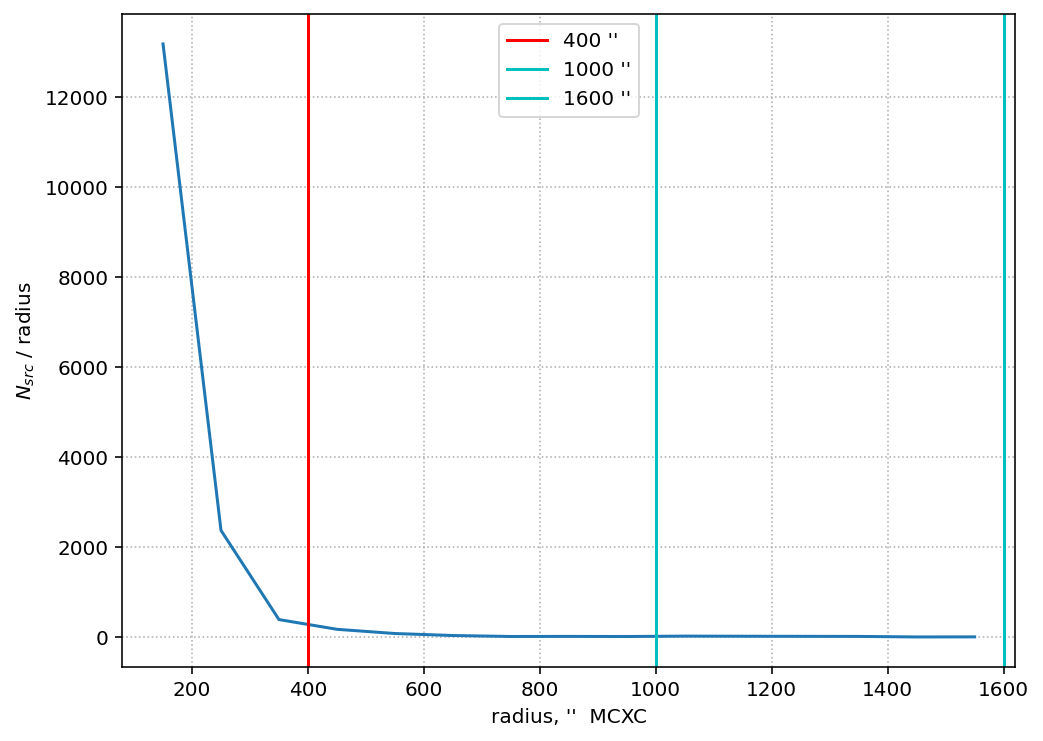

In [13]:
cat='MCXC'
plot_n_src(x, n_src[cat], cat=cat, rads=rads1)

<ipython-input-7-b3a4c19da439>:5: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(x, n_src_arr/np.arange(*rads))


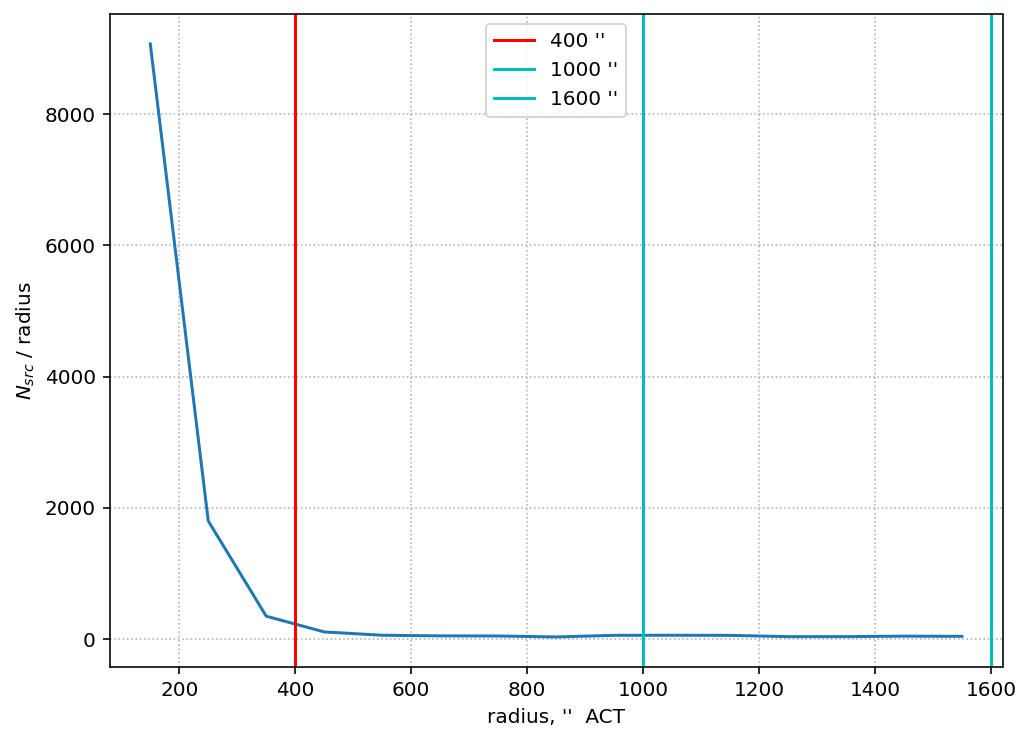

In [14]:
cat='ACT'
plot_n_src(x, n_src[cat], cat=cat, rads=rads1)

In [11]:
cat='eROSITA'
plot_n_src(x, n_src[cat], cat=cat, rads=rads1)

KeyError: 'eROSITA'

In [64]:
for cat in n_src:
    np.save('/home/rt2122/Data/cur/n_src2rad/{}_{}_{}_{}.npy'.format(cat, *rads), n_src)

In [6]:
list(n_src)

['PSZ2(z)', 'MCXC', 'ACT']